Epoch: 1  Training Loss: 2.0345738726116602  Time (sec): 11.686606884002686
Epoch: 2  Training Loss: 1.743487790809468  Time (sec): 13.425903081893921
Epoch: 3  Training Loss: 1.654605895303076  Time (sec): 12.030785083770752
Epoch: 4  Training Loss: 1.594290580610731  Time (sec): 11.49620509147644
Epoch: 5  Training Loss: 1.5479674578823162  Time (sec): 11.109664916992188
Epoch: 1  Training Loss: 1.9841297983132937  Time (sec): 12.162020206451416
Epoch: 2  Training Loss: 1.8195231178097497  Time (sec): 13.574800968170166
Epoch: 3  Training Loss: 1.7629213959532426  Time (sec): 11.226427793502808
Epoch: 4  Training Loss: 1.7243213622483808  Time (sec): 26.729435205459595
Epoch: 5  Training Loss: 1.696392329017842  Time (sec): 12.82606816291809
Epoch: 1  Training Loss: 2.0641943974926984  Time (sec): 17.48720097541809
Epoch: 2  Training Loss: 1.8795851476738106  Time (sec): 20.797203063964844
Epoch: 3  Training Loss: 1.8370264811494288  Time (sec): 21.24993395805359
Epoch: 4  Training L

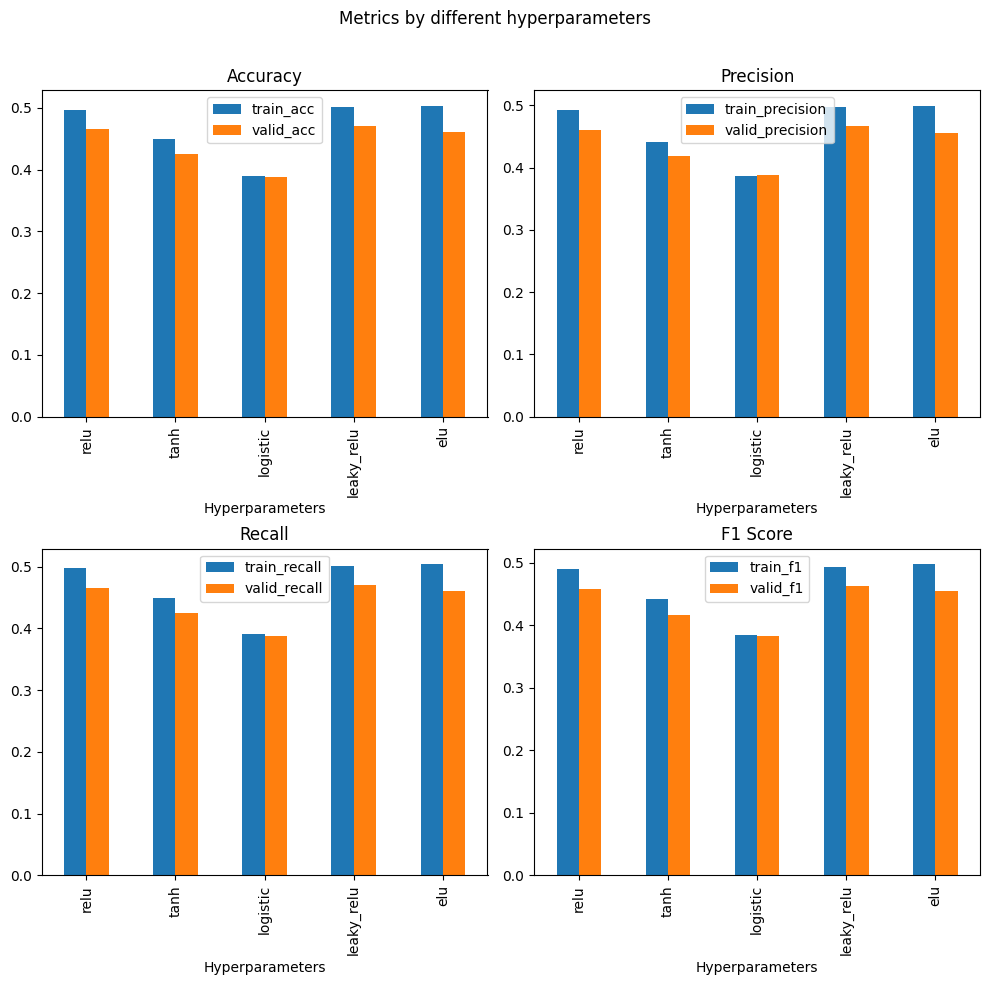

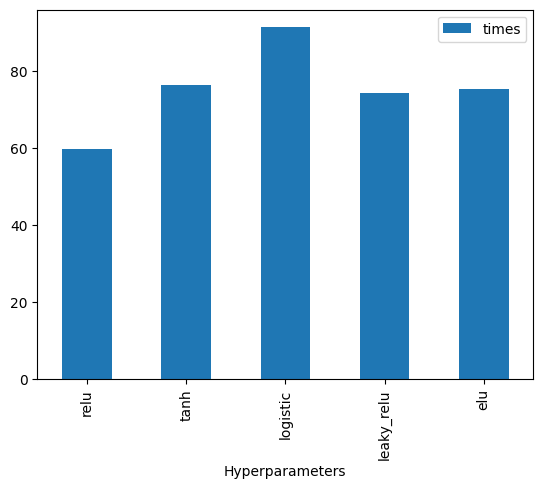

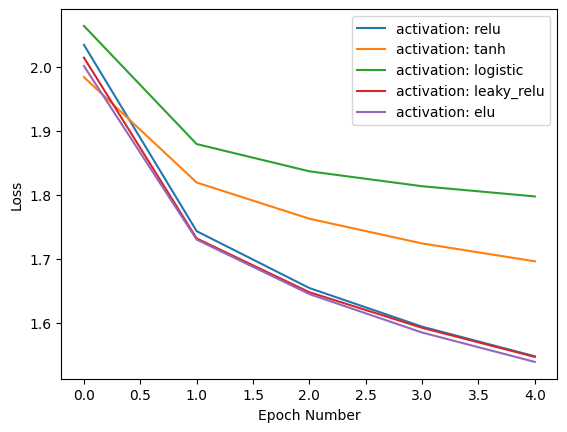

In [1]:
from algorithms import Evals

# Setup activation experiment
activaitons = ['relu', 'tanh', 'logistic', 'leaky_relu', 'elu']

eval_dict = Evals.set_exp(exps= activaitons, exp_name= 'activation')
eval_df = Evals.run_exp(exp_dict= eval_dict, epochs= 1)